# Notes from Forecasting: Principles and Practice (Hyndman and Athanasopoulos)

### What is Forecasting? How to make it accurate? 
Forecasting is about predicting the future as accurately as possible, given the information we have 

Things that make forecasting more accurate: 
- Having a good understanding of contributing factors 
- Availability of data. More historic data = better 
- Likelihood that things will continue to behave similarly 
- Whether forecasts are very dependent on consumer behavior

**Qualitative forecasting** must be used if there is no data available, or if the data are not relevant to the forecasts.  
**Quantative forecasting** can be done if: 
1. numerical information about the past is available 
2. it is reasonable to assume that some aspects of past patterns will continue into the future 

### Time Series Forecasting: Explanatory and Time Series Models 
The simplest time series forecasts only look at the variable itself, and make no attempt to understand other factors that may affect its behavior. This is more `extrapolation` or `finding seasonal patterns`. 
 
**Explanatory models** help explain the variation in a variable.  
EX: electricity_demand = f(temperature, population, time of day, day of week, error)

**Time series models** predict future events based only on past data. They do not take into account external variables.  
EX: electricity_demand_in_one_hour = f(EDt,EDt−1,EDt−2,EDt−3,…,error)  
Time series models may be selected if:
- it is not understood what variables affect the data
- it is extremely complex to model the variables that affect the data 
- it may be necessary to forecast predictors in order to forecast the variable of interest (difficult!)
- may not need to know "why" something happens, just that it "does" happen 
- the time series may be more accurate than the explanatory model 


**Mixed models** use both of the above methods  
EX: = electricity_demand_in_one_hour = f(ED_over_time, current temperature, time of day, day of week, error)



- Uncertainty intervals can be included in the forecast 


### Steps in a Forecasting Task 
1. Problem definition 
- How will the forecast be used? 
- What question will it answer? 
- How does the forecast fit within the organization? 
2. Gathering information 
- Gather statistical data 
- Gather information from SMEs who collected the data 
- Gather information from the SMEs who will use the forecasts 
3. Preliminary analysis 
- Start with some basic graphs of the data. 
- Are there any patterns or trends? 
- Is seasonality important? 
- Is there evidence of a business cycle? 
- Are there any outliers that need explaining? 
4. Choosing and fitting models 
- Compare 2 or 3 potential models  
- Try regression models, exponential smoothing, ARIMA, dynamic regression, etc.
5. Using and evaluating a forecasting model 
- Use the model to make forecasts. Check the model against data that was NOT used to generate the model. A

### Selecting Predictors

- **NOT RECOMMENDED** Plotting the forecast variable against a particular predictor, and if there is no noticeable relationship, drop that predictor from the model.  
^ This is not recommended becuase it is not always possible to see the relationship from a scatterplot, especially when the effects of other predictors have not been acounted for 


### Variation in Forecasting 
A forecast is typically accompanied by a **prediction interval**. 
- In general, the closer in time the event we are trying to forecast is, the more the variation shrinks. So, forecasting events that will happen *soon* will likely be more accurate than trying to forecast events that are far in the future. 
- When we obtain a forecast, we are estimating the **middle** of the range of possible values 



### Time Series Patterns 
- **Trends** refer to a long-term increase or decrease in the data (it does not have to be linear) 
- **Seasonality** is when a time series is affected by seasonal factors such as time of day, month of year, etc. 
- **Cyclic**: A cycle occurs when the data exibit rises and falls that *are not* of a fixed frequency 


- Moving averages are used to estimate the trend cycle, from which seasonality is determined

If fluctuations are *not of fixed frequency* they are cyclic.   
If fluctiations *are of fixed frequency* they are seasonal. 

Can do lots of nice seasonality plots by using `df.pivot_table` and `df.group_by`

### Seasonal Sub-series Plots
The data for each season is collected together in a mini sub-plot, then a 'mean' for the season is plotted in each sub-series plot. 

This form of plot enables the seasonal patterns to be seen clearly, as well as changes in seasonality over time. 

### Correlation 
Measures the strength between the **linear** relationship of two variables. Therefore, it can sometimes be misleading. 


### Autocorrelation 
Autocorrelation measures the linear relationship between lagged values of a time series. 
You can plot the autocorrelation versus the lag to determine seasonality of data. 

### Scatterplot Matrices 
When there are multiple variables, it can be useful to plot each variable against one another. 


array([[<AxesSubplot:xlabel='a', ylabel='a'>,
        <AxesSubplot:xlabel='b', ylabel='a'>,
        <AxesSubplot:xlabel='c', ylabel='a'>,
        <AxesSubplot:xlabel='d', ylabel='a'>],
       [<AxesSubplot:xlabel='a', ylabel='b'>,
        <AxesSubplot:xlabel='b', ylabel='b'>,
        <AxesSubplot:xlabel='c', ylabel='b'>,
        <AxesSubplot:xlabel='d', ylabel='b'>],
       [<AxesSubplot:xlabel='a', ylabel='c'>,
        <AxesSubplot:xlabel='b', ylabel='c'>,
        <AxesSubplot:xlabel='c', ylabel='c'>,
        <AxesSubplot:xlabel='d', ylabel='c'>],
       [<AxesSubplot:xlabel='a', ylabel='d'>,
        <AxesSubplot:xlabel='b', ylabel='d'>,
        <AxesSubplot:xlabel='c', ylabel='d'>,
        <AxesSubplot:xlabel='d', ylabel='d'>]], dtype=object)

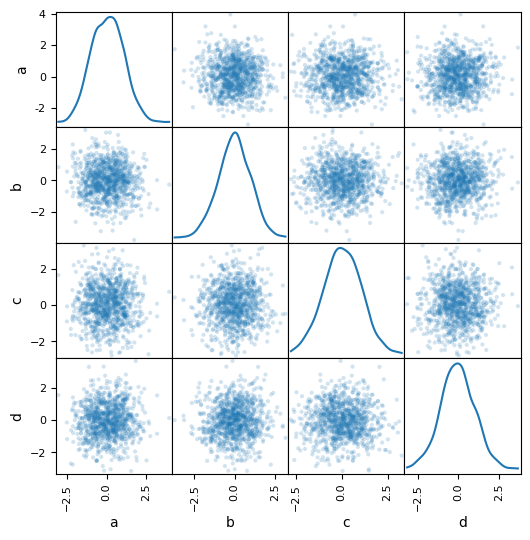

In [6]:
# pandas example: 
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns = ['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')

### Transformations and adjustments
1. **Calendar adjustments**
- Remove calendar adjustments by averaging cyclic data. 
- For example, if looking at sales over a year, February may have fewer sales vs March because Feb has 28 days to March's 31. Averaging sales per day may eliminiate this calendar effect 
2. **Population adjustments** 
- Any data that may be affected by population should be adjusted to show *per-capita* data 
3. **Inflation adjustments**
- Data which are affected by the value of money should be adjusted for inflation so that all values are stated in dollar values from a particular year.
- To make these adjustments, a price index is used. A common price index is the Consumer Price Index (CPI). 
4. **Mathematical Transformations** 
- If the data shows variation that increases or decreases with the level of the series, than a mathematical transformation could be useful. 
- A logarithmic transformation where *lambda* makes the size of the period about the same across the whole series may be appropriate. 

### Simple Forecating Methods

#### Mean Method 
- The forecast of all future values is equal to the mean of the historical data 

#### Naive Model (Also called Random Walk Forecast) 
- The forecast is set to the value of the last observation in the time series 

#### Seasonal Naive Model
- For highly seasonal data, each forecast is set to the last observed value of the same season 

#### Drift Method 
- A variance on naive models is to allow the forecast to increase or decrease over time 
- The drift is set to be the average change seen in the historical data (equivalent to drawing a line between first and last data point and extrapolating that slope into the future). 

### Residuals 
Residuals are what is left over after fitting a model 

Residual = observed - forecast 

**Innovation residuals** are residuals that are transformed (for example, a log transform) in the same way the observed data was. 

### Residual Diagnostics 
A good forecasting model will yield residuals with the following properties: 
1. The innovation residuals are uncorrleated. If there is a correlation, then there is information left in the residuals which should be used in computing the forecast. (Do an ACF to check correlation.)
2. The innovation residuals have zero mean. If they do not have zero mean, the forecasting model is biased and needs to be shifted (subtract the mean from the forecasts to shift the forecast). 
3. The residuals have constant variance over the range of data (known as "homoscedasticity"). Check this by plotting the residuals over time. 
4. The residuals are normally distributed (i.e. gausian distribution centered at zero mean indicating randomness). 
5. Plot the residuals against the predictors (both predictors that are used in the model, and predictors that were not used in the model). There should be no relationship. If there is, the relationship may be non-linear. 

Checking these properties is important to ensure the forecasting model is using all of the available information, but it is not a good way to select a forecasting method.

**GETTING ALL THESE RESIDUAL PLOTS**: 
There is a useful formula [here called plot_tsresiduals](https://github.com/zgana/fpp3-python-readalong/blob/adf28b0fe1b350a809d9e780837a80d6fc4075a2//utils.py) which takes the observation, and forecast, and makes nice residual plots. 

### Forecast Distributions / Prediction Intervals 
Point forecasts aren't that useful. To know how accurate the forecast is, prediction intervals give a clue as to the uncertainty of the forecast. 


### Forecasting with Decomposition 
To forecast a decomposed time series, we forecast the seasonal component (S) and the seasonally adjusted (trend) component (A) separately. 

In other words, a seasonal naive model is used for the seasonal component. 

To forecast the non-seasonal component, any model may be used including: 
- Drift 
- Holts
- Non-seasonal ARIMA 


### Accuracy of Forecasts 
The accuracy of a forecast can only be determined by considering how well a model performs on new data that was not used when fitting the model. 

**Training and Test Sets**
- The test set is usually about 20% of the total sample size 
- Test set should be ideally as large as the max forecast horizion 

**Forecast error** is the difference between observed and forecasted. Any "error" can be attributed to the unpredicted part of the forecast. 

### Time Series Regression Models
Forecast a time series of interest, assuming it has a relationship with another time series 
Single linear regression is just of form y=mx+b

**Multiple linear regression**
- We assume that a linear model is a reasonable approximate to reality 

y=(m_1)(x_1) + (m_2)(x_2) + (m_3)(x_3) + B  
where:  
**x_n** are the predictor variables   
**m_n** measure the effect of the predictor variable after taking into account all of the other predictor variables (called the *marginal effect*) 

**Least Squares Estimation**: 
- Choose coefficients for the regression model that minimize the sum of the squared errors 
- When looking at the output of a LSE model, there will be a **coefficient** and an **estimated standard error**
- The standard error gives an estimate of the uncertainty of the coefficient value. 

**Goodness-of-fit and R^2**
- Square of the correlation between the observed values and predicted values 
- Defined 1 - [(sum of the squared error of the forecast) divided by (squared difference of **observation** from the mean)]

**R^2 is often mis-used**
- Adding extra predictors will never decrease R^2, and can lead to over-fitting the model 
- There are no rules for what a good R^2 value is for a given model 
- "Typical" R^2 values depend on the type of data used 
- **Using a model's forecast performance is much better than calculating R^2 value on training data."**
- An R^2 value of 0.78 means the model explains 78% of the variation in the data 


### Useful predictors in time series data 
- **Trend**: A linear trend often works 

- **Dummy variables (indicator variables)**: 
- These can take the place of boolean values -- they can be set to a value of 0 or 1 to represent things like "is it a holiday today?".
- They can still be handled in the framework of regression models, and can often be used to account for outlier data. 
- They can handle seasonality, and represent things such as "day of the week". 
- There should be 1 less dummy variable than number of options, so with "days of the week", there should be 6 dummy variables. That's because the n_th category is captured by the intercept 
- The dummy variable's effect is then measured on the omitted variable. For example: if you omit "Sunday" from the day of week list and represent it as the intercept
- Each variable is measured as its effect *relative* to the variable that is represented by the intercept. So, if Sunday is left as the intercept, all other variables are measured as their impact relative to Sunday 